In [1]:
# 기본 패키지
import pandas as pd
import numpy as np

# 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') 
plt.style.use(['ggplot'])

# 변수 생성 패키지
import datetime

# 한글 시각화시 필요 모듈
import platform # 사용자 운영체제 확인
platform.system()
## 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
## 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'


# 경고 메시지 무시
import warnings
warnings.filterwarnings(action='ignore') 


# 버전 확인
print('Pandas : %s'%(pd.__version__))
print('seaborn : %s'%(sns.__version__))
print('matplotlib : %s'%(matplotlib.__version__))
!python --version

Pandas : 1.2.1
seaborn : 0.11.1
matplotlib : 3.5.1
Python 3.8.13


## Load Data

In [2]:
loan = pd.read_csv('../data/loan_fillna.csv')
# loan = pd.read_csv('../data/loan_result.csv')

# log = pd.read_csv('../data/log_data.csv')

user = pd.read_csv('../data/user_fillna.csv')
# user = pd.read_csv('../data/user_spec.csv')

In [3]:
user2 = user.copy()

대출이력이 있는 고객 feature 생성

In [4]:
loan_true = loan[loan['is_applied'] == 1]
loan_true_list = loan_true['application_id'].unique()

tempt = []

for i in range(len(user['application_id'])):
    if user['application_id'][i] in loan_true_list:
        tempt.append(1)
    else:
        tempt.append(0)
        
user['loan_history'] = tempt

insert time 날짜 변경

In [5]:
# insert time : 한도조회 당시 시간
user['insert_time'] = pd.to_datetime(user2['insert_time'])

In [95]:
# 해결안됨

# user2.loc[user2['birth_year'] == "없음", 'birth_year'] = "9999.0"
# user2['birth_year'].unique()
# 현재나이
dt_now = datetime.datetime.now()
user2.loc[user2['birth_year'] == "없음", 'birth_year'] = "9999.0"
user2['age'] = user2['birth_year'].str[:-2].astype(int) - dt_now.year
pd.to_datetime(user2['birth_year'],format = '%Y')
user2.head()

array(['1985.0', '1968.0', '1997.0', '1989.0', '2000.0', '1994.0',
       '1976.0', '1992.0', '1991.0', '1980.0', '1981.0', '1987.0',
       '1986.0', '1996.0', '1990.0', '1965.0', '1993.0', '1978.0',
       '1974.0', '1984.0', '1983.0', '2001.0', '1975.0', '1995.0',
       '1998.0', '1962.0', '1972.0', '1982.0', '1988.0', '1979.0',
       '1963.0', '1959.0', '1967.0', '1957.0', '1999.0', '1971.0',
       '1977.0', '1955.0', '1973.0', '2002.0', '1969.0', '1966.0',
       '1964.0', '1970.0', '1947.0', '1960.0', '1958.0', '1961.0',
       '1943.0', '1948.0', 9999, '1954.0', '1932.0', '1939.0', '1951.0',
       '1956.0', '1953.0', '1945.0', '1952.0', '1950.0', '2003.0',
       '1942.0', '1946.0', '1934.0', '1949.0', '1938.0', '1941.0',
       '1940.0', '1944.0', '1936.0', '1933.0', '1937.0', '2004.0',
       '1931.0', '1935.0', '2005.0', '2006.0', '1927.0', '2007.0',
       '2008.0', '1930.0', '1929.0'], dtype=object)

나이

In [6]:
dt_now = datetime.datetime.now()

def create_age(x):
    if x != '없음':
        return dt_now.year - int(x[:-2])
    else:
        return x
    
user['age'] = user['birth_year'].apply(create_age)

In [30]:
user[['birth_year','age']]

,birth_year,age
0,1985.0,37
1,1968.0,54
2,1997.0,25
3,1989.0,33
4,2000.0,22
...,...,...
1394211,2000.0,22
1394212,1955.0,67
1394213,1983.0,39
1394214,1975.0,47


연령대

In [8]:
def age_group(x):
    if x == "없음":
        return x
    if int(x) < 20 :
        return '10대'
    elif int(x) < 30 :
        return '20대'
    elif int(x) < 40 :
        return '30대'
    elif int(x) < 50 :
        return '40대' 
    elif int(x) < 60 :
        return '50대'
    elif int(x) < 70 :
        return '60대'
    elif int(x) < 80:
        return '70대'
    else:
        return '80대 이상'
    
user['age_group'] = user['age'].apply(age_group)

In [29]:
user[['age','age_group']]

,age,age_group
0,37,30대
1,54,50대
2,25,20대
3,33,30대
4,22,20대
...,...,...
1394211,22,20대
1394212,67,60대
1394213,39,30대
1394214,47,40대


<AxesSubplot:xlabel='age_group', ylabel='count'>

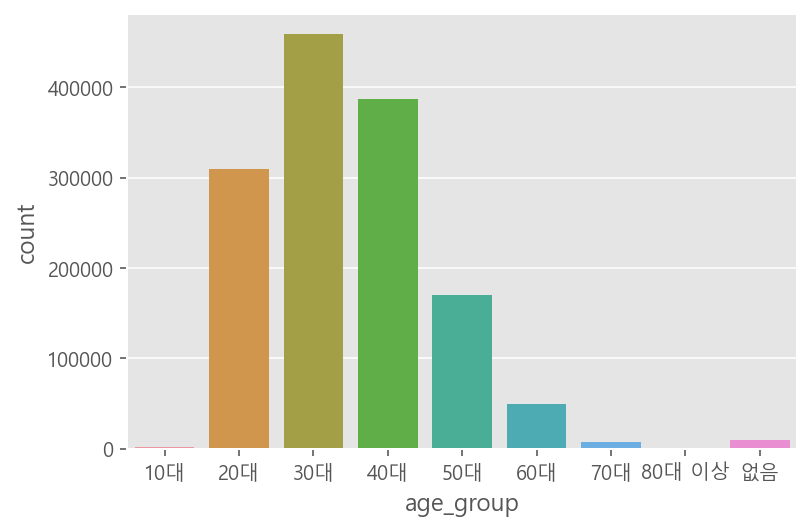

In [10]:
sns.countplot(user['age_group'], order = sorted(user['age_group'].unique()))

신용등급

In [11]:
'''
finda 신용등급은 코리아크레딧뷰로(KCB)사용
1 : 942 ~ 1000
2 : 891 ~ 941
3 : 832 ~ 890
4 : 768 ~ 831
5 : 698 ~ 767
6 : 630 ~ 697
7 : 530 ~ 629
8 : 454 ~ 529
9 : 335 ~ 453
10 : 0 ~ 334
'''

def credit_rating(x):
    if x >= 942:
        return "1"
    elif x >= 891:
        return "2"
    elif x >= 832:
        return "3"
    elif x >= 768:
        return "4"
    elif x >= 698:
        return "5"
    elif x >= 630:
        return "6"
    elif x >= 530:
        return "7"
    elif x >= 454:
        return "8"
    elif x >= 335:
        return "9"
    else:
        return "10"
    
user['credit_rating'] = user['credit_score'].apply(credit_rating)

In [31]:
user[['credit_score','credit_rating']]

,credit_score,credit_rating
0,660.000000,6
1,870.000000,3
2,710.000000,5
3,820.000000,4
4,630.000000,6
...,...,...
1394211,590.000000,7
1394212,980.000000,1
1394213,750.000000,5
1394214,640.000000,6


<AxesSubplot:xlabel='credit_rating', ylabel='count'>

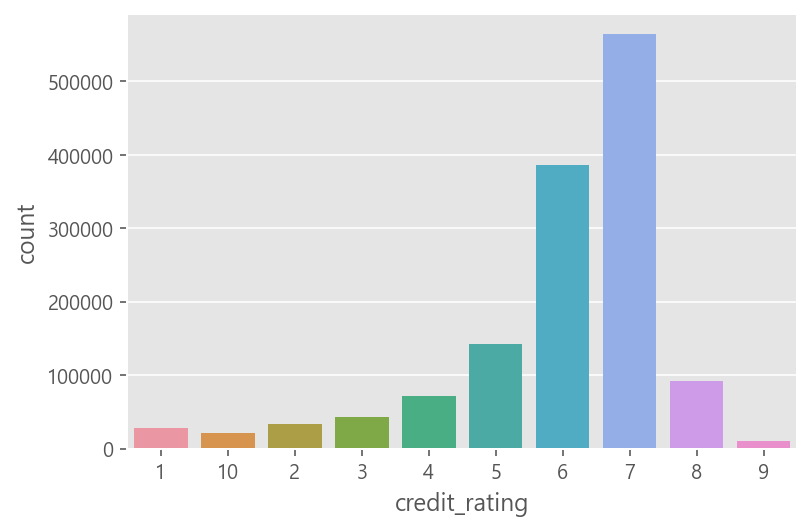

In [13]:
sns.countplot(user['credit_rating'], order = sorted(user['credit_rating'].unique()))

소득등급

In [ ]:
# 상세 소득수준(ex.연령대별 평균과 비교) or 세분화된 소득분위(ex.10등급으로 세분, 장학재단에서 사용하는 소득분위) 추가

In [32]:
percent = user['yearly_income'].describe()

def income_rating(x):
    if x < percent[4]:
        return 4
    elif x < percent[5]:
        return 3
    elif x < percent[6]:
        return 2
    else:
        return 1

user['income_rating'] = user['yearly_income'].apply(income_rating)

In [27]:
print(percent[4])
print(percent[5])
print(percent[6])

25000000.0
34000000.0
48000000.0


In [33]:
user[['yearly_income','income_rating']]

,yearly_income,income_rating
0,108000000.0,1
1,30000000.0,3
2,30000000.0,3
3,62000000.0,1
4,36000000.0,2
...,...,...
1394211,25000000.0,3
1394212,20000000.0,4
1394213,75000000.0,1
1394214,50000000.0,1


<AxesSubplot:xlabel='income_rating', ylabel='count'>

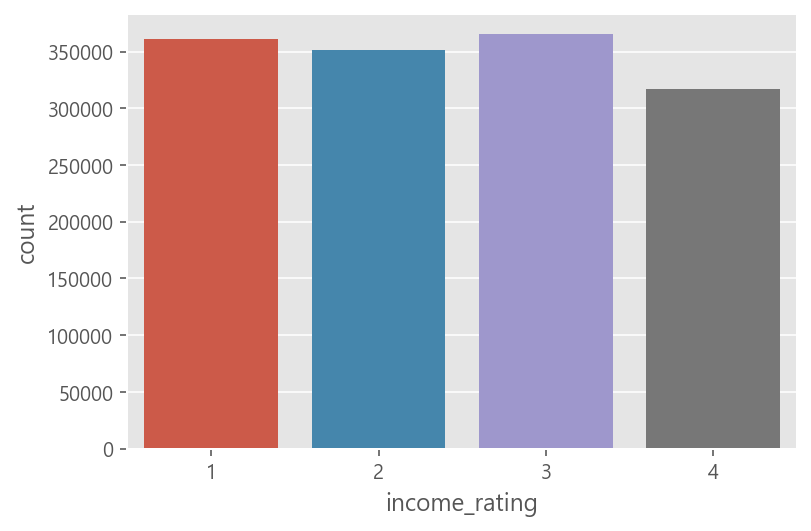

In [34]:
sns.countplot(user['income_rating'], order = sorted(user['income_rating'].unique()))

근속년수

In [77]:
dt_now = datetime.datetime.now()

def service_year(x):
    if x != "입사년도 없음":
        return dt_now.year - int(x[:4]) + 1
    else:
        return x

user['service_year'] = user['company_enter_month'].apply(service_year)

In [78]:
user[['company_enter_month','service_year']]

,company_enter_month,service_year
0,20151101.0,8
1,20070201.0,16
2,20210901.0,2
3,20170101.0,6
4,20210901.0,2
...,...,...
1394211,202106.0,2
1394212,입사년도 없음,입사년도 없음
1394213,200908.0,14
1394214,201705.0,6


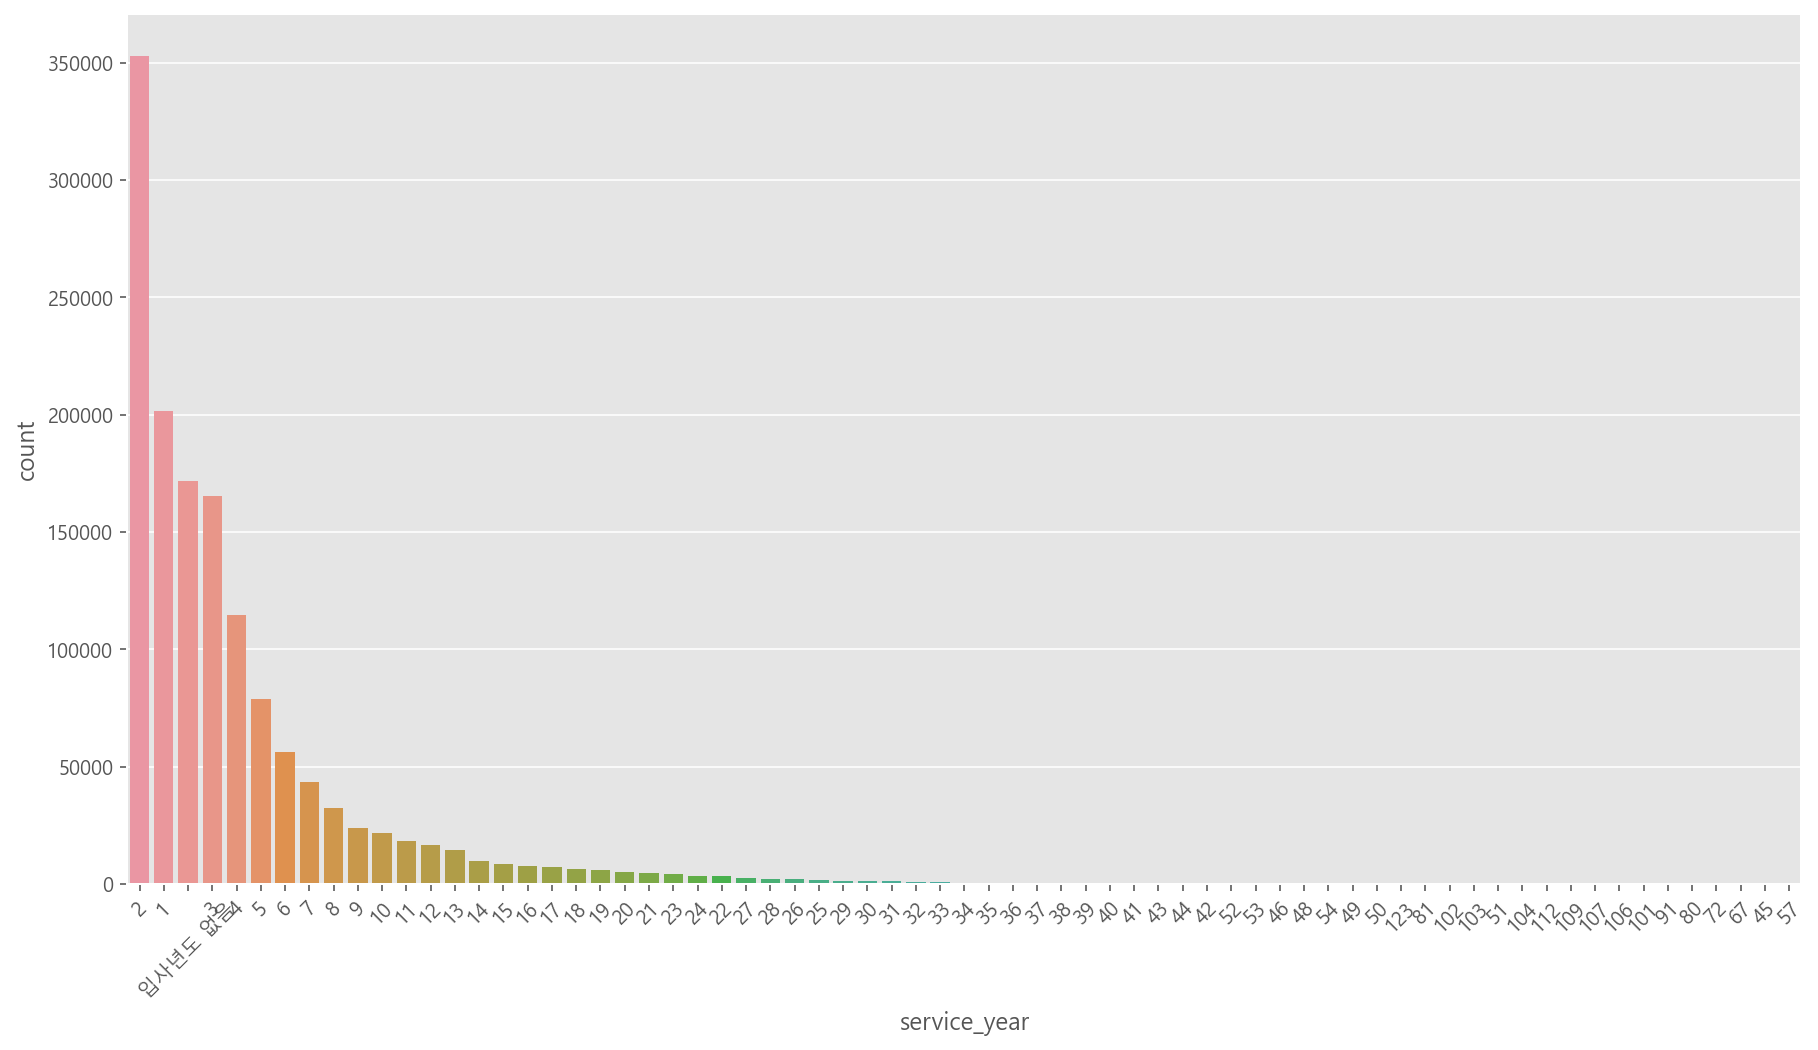

In [79]:
plt.figure(figsize = (15,8))
sns.countplot(user['service_year'], order = user['service_year'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

대출희망금액과 실제 한도 비교

In [82]:
loan.groupby('application_id')['loan_limit'].agg('max')

application_id
1          32000000.0
2          15000000.0
4          26000000.0
6          48000000.0
8          13000000.0
              ...    
2167817    35000000.0
2167819    40000000.0
2167820    38000000.0
2167822    11000000.0
2167826    22000000.0
Name: loan_limit, Length: 968866, dtype: float64

In [84]:
user[user['user_id'] == 118218]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,loan_history,age,age_group,credit_rating,income_rating,service_year
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,...,0,2.0,4.0,162000000.0,0,37,30대,6,1,8
46749,885140,118218,1985.0,1.0,2022-03-12 10:47:24,690.0,100000000.0,PRIVATEBUSINESS,201511.0,기타,...,0,2.0,4.0,162000000.0,0,37,30대,6,1,8
48293,2158388,118218,1985.0,1.0,2022-03-04 15:58:19,690.0,100000000.0,PRIVATEBUSINESS,201511.0,기타,...,0,2.0,4.0,162000000.0,0,37,30대,6,1,8
64039,305553,118218,1985.0,1.0,2022-05-03 16:03:40,660.0,100000000.0,PRIVATEBUSINESS,201511.0,기타,...,0,2.0,4.0,162000000.0,0,37,30대,6,1,8
155589,658694,118218,1985.0,1.0,2022-05-31 10:54:41,660.0,108000000.0,PRIVATEBUSINESS,201511.0,기타,...,0,2.0,4.0,162000000.0,0,37,30대,6,1,8
157460,853074,118218,1985.0,1.0,2022-04-02 10:28:39,650.0,100000000.0,PRIVATEBUSINESS,201511.0,기타,...,0,2.0,4.0,162000000.0,0,37,30대,6,1,8
159870,1075695,118218,1985.0,1.0,2022-03-28 11:08:13,650.0,100000000.0,PRIVATEBUSINESS,201511.0,기타,...,0,2.0,4.0,162000000.0,0,37,30대,6,1,8
264125,365765,118218,1985.0,1.0,2022-03-02 19:46:23,760.0,100000000.0,PRIVATEBUSINESS,201511.0,계약직,...,0,2.0,4.0,162000000.0,0,37,30대,5,1,8
395616,737407,118218,1985.0,1.0,2022-06-02 12:33:28,660.0,105000000.0,PRIVATEBUSINESS,201511.0,계약직,...,0,2.0,4.0,162000000.0,0,37,30대,6,1,8
400525,1414424,118218,1985.0,1.0,2022-05-06 16:17:11,660.0,100000000.0,PRIVATEBUSINESS,201511.0,기타,...,0,2.0,4.0,162000000.0,0,37,30대,6,1,8


In [17]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394216 entries, 0 to 1394215
Data columns (total 17 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   application_id                       1394216 non-null  int64  
 1   user_id                              1394216 non-null  int64  
 2   birth_year                           1394216 non-null  object 
 3   gender                               1394216 non-null  object 
 4   insert_time                          1394216 non-null  object 
 5   credit_score                         1394216 non-null  float64
 6   yearly_income                        1394216 non-null  float64
 7   income_type                          1394216 non-null  object 
 8   company_enter_month                  1394216 non-null  object 
 9   employment_type                      1394216 non-null  object 
 10  houseown_type                        1394216 non-null  object 
 11

In [101]:
user['insert_time'].str[:7].unique()

array(['2022-06', '2022-04', '2022-03', '2022-05'], dtype=object)

## loan 변수 생성

In [118]:
loan

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,month
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN,6
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN,6
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN,6
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN,6
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN,6
...,...,...,...,...,...,...,...,...
13527332,1428218,2022-06-03 12:01:58,62,200,3000000.0,14.8,NaN,6
13527333,1428218,2022-06-03 12:01:49,2,7,40000000.0,11.8,NaN,6
13527334,1428218,2022-06-03 12:01:48,32,257,15000000.0,7.2,NaN,6
13527335,1428218,2022-06-03 12:01:48,33,110,44000000.0,13.5,NaN,6


In [119]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13527337 entries, 0 to 13527336
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   application_id         int64  
 1   loanapply_insert_time  object 
 2   bank_id                int64  
 3   product_id             int64  
 4   loan_limit             float64
 5   loan_rate              float64
 6   is_applied             float64
 7   month                  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 825.6+ MB


In [120]:
loan.head(3)

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,month
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN,6
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN,6
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN,6


In [122]:
loan_insert_year = pd.to_datetime(loan['loanapply_insert_time'], format = )
loan_insert_year

0           2022
1           2022
2           2022
3           2022
4           2022
            ... 
13527332    2022
13527333    2022
13527334    2022
13527335    2022
13527336    2022
Name: loanapply_insert_time, Length: 13527337, dtype: object

In [ ]:
'''
# user
연소득/신용점수
기대출금액/연소득
'''

'''
타깃 불균형이 심하다보니 이걸 해결할 수 있는 방법
회귀 문제에는 우선 user_spec, loan_result 데이터를 사용해보고 
군집화문제에 log_data를 추가적으로 사용하는 방법

credit_score'가 극단적으로 낮은 경우가 몇 개 있음
핀다 사용자 10명 중 6명은 중금리대출
인터넷 은행이 채우지 못한 중금리대출의 니즈를 채워줌
'''

In [ ]:
user.to_csv('feature_user.csv')

In [ ]:
loan.to_csv('feature_loan.csv')

In [218]:
# 데이터 병합
data = pd.merge(loan, user, on = "application_id").reset_index(drop = True)
data.to_csv("../data/data.csv")